In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
#fixedDataset.to_csv('Cleaned-Data.csv')
fixedDataset = pd.read_csv('Bert-Rel.csv', index_col=0)

In [0]:
fixedDataset.head()

,title,text,Label
0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,0
1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,0
2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,0
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,0
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,0


In [0]:
relevant_data = fixedDataset
relevant_data.sample(10)

,title,text,Label
41118,threats to business to remove trump sign promp...,please go to the best mulch facebook page and ...,1
42528,austrian parents and teachers sacrifice young ...,anyone up for a european vacation how about se...,1
23344,report trump is costing america billions in t...,donald trump won t tell you this on his twitte...,1
25483,donald trump is going to hate what the ny tim...,if you needed more proof that donald trump is ...,1
19438,eu officials reach draft deal on more north ko...,brussels reuters eu ambassadors have reached ...,0
10111,trump in unexpected meeting with republican pa...,washington reuters us republican presidential...,0
3475,any us withdrawal from paris deal no good sign...,berlin reuters a decision by us president don...,0
27113,fox news attacks lgbt community with disgusti...,lgbt crowd eyes preschool children that s th...,1
31484,phoenixrally rocks watch president trump calls...,president trump spoke to a huge and enthusiast...,1
31028,rino senator flake trashes trump and republica...,the swamp is draining one more rino is not run...,1


In [0]:
%matplotlib inline
from collections import Counter

stops = set(stopwords.words("english"))
fake = Counter()
real = Counter()
for index, row in relevant_data.iterrows():
    # if index == 0:
    #     print(row["text"])
    #     break
    if row["Label"] == 1:
        for word in row["text"].split(' '):
            if word not in stops and word.isalpha():
                fake[word] += 1
    else:
        for word in row["text"].split(' '):
            if word not in stops and word.isalpha():
                real[word] += 1
        
print(real.most_common(5))
print(fake.most_common(5))



[('said', 98985), ('trump', 42577), ('us', 41137), ('would', 31514), ('reuters', 28306)]
[('trump', 73933), ('said', 31013), ('people', 25963), ('president', 25586), ('would', 23427)]


In [0]:
plt.bar(real.most_common(5))


TypeError: ignored

In [0]:
print(real)

In [0]:
train_indices = np.random.rand(len(relevant_data)) < 0.8
train = relevant_data[train_indices].reset_index(drop=True)
test = relevant_data[~train_indices].reset_index(drop=True)
print(train.head())
print(len(train))
print(test.head())
print(len(test))

                                               title  ... Label
0  as us budget fight looms republicans flip thei...  ...     0
1  us military to accept transgender recruits on ...  ...     0
2  senior us republican senator let mr mueller do...  ...     0
3  fbi russia probe helped by australian diplomat...  ...     0
4  trump wants postal service to charge much more...  ...     0

[5 rows x 3 columns]
35961
                                               title  ... Label
0  factbox trump on twitter dec   approval rating...  ...     0
1              trump on twitter dec   global warming  ...     0
2            trump on twitter dec   trump iraq syria  ...     0
3  trump on twitter dec   hillary clinton tax cut...  ...     0
4  treasury secretary mnuchin was sent giftwrappe...  ...     0

[5 rows x 3 columns]
8937


In [0]:
#train model
def training_step(training_data, vectorizer):
    training_text = []
    training_result = []
    for i in range(len(training_data)):
        #training_text.append(training_data['text'][i])
        training_text.append(' '.join(str(x) for x in training_data['text'][i]))
        training_result.append(training_data['Label'][i])
    training_text = vectorizer.fit_transform(training_text)   
    classifier = MultinomialNB().fit(training_text, training_result) #remove toarray for bernoulli/multi
#     print("Classifier: " + str(classifier))
#     print("Classifier log prior: " + str(classifier.class_log_prior_))
#     print("Feature log prob: " + str(classifier.feature_log_prob_))
    classifier.get_params()
    return classifier

In [0]:
#return block of text and its classifier prediction
def analyze_text(classifier, vectorizer, text):
#     print("Classifier prediction: " + str(classifier.predict(vectorizer.transform([text]))))
    return text, classifier.predict(vectorizer.transform([text]))

In [0]:
#evaluate model performance
def evaluate(evaluation_data, vectorizer):
    evaluation_text = []
    evaluation_result = []
    #separate features/labels
    for i in range(len(evaluation_data)):
        #training_text.append(training_data['text'][i])
        evaluation_text.append(' '.join(str(x) for x in evaluation_data['text'][i]))
        evaluation_result.append(evaluation_data['Label'][i])
    #check accuracy of classifier on evaluation data
    total = len(evaluation_text)
    corrects = 0
    for i in range(0, total):
        result = classifier.predict(vectorizer.transform([evaluation_text[i]])) #remove toarray
        text = evaluation_text[i]
        corrects += 1 if result[0] == evaluation_result[i] else 0
    print("Accuracy: ", corrects * 100 / total)
    return corrects * 100 / total

In [0]:
# v = CountVectorizer('binary=true')
v = CountVectorizer()
classifier = training_step(train, v)
acc = evaluate(test, v)
print(acc)

In [0]:
v.get_feature_names()

In [0]:
!pip install transformers

     |████████████████████████████████| 573kB 12.8MB/s 
     |████████████████████████████████| 3.7MB 51.3MB/s 
     |████████████████████████████████| 1.0MB 53.3MB/s 
     |████████████████████████████████| 890kB 54.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=3e61cdbbb0a67512c832bad250991c7eec483874f013ccdfb53fbe6a7e0da9ea
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [0]:
from transformers import BertTokenizer
import torch

In [0]:
training_data = train[['title','Label']]
training_data.head(10)

,title,Label
0,as us budget fight looms republicans flip thei...,0
1,us military to accept transgender recruits on ...,0
2,senior us republican senator let mr mueller do...,0
3,fbi russia probe helped by australian diplomat...,0
4,trump wants postal service to charge much more...,0
5,white house congress prepare for talks on spen...,0
6,trump says russia probe will be fair but timel...,0
7,alabama official to certify senatorelect jones...,0
8,jones certified us senate winner despite moore...,0
9,new york governor questions the constitutional...,0


In [0]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [0]:
# test tokenizer
tokenizer.tokenize(training_data.title[0])

['as',
 'us',
 'budget',
 'fight',
 'lo',
 '##oms',
 'republicans',
 'flip',
 'their',
 'fiscal',
 'script']

In [0]:
# calculate max length of title
max_len = 0
for t in training_data.title.values:
    input_ids = tokenizer.encode(t, add_special_tokens=True)
    max_len = max(max_len, len(input_ids))
print(max_len)

60


In [0]:
input_ids = []
at_masks = []
for t in training_data.title.values:
    encoded = tokenizer.encode_plus(t, add_special_tokens = True, max_length=64, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')
    input_ids.append(encoded['input_ids'])
    at_masks.append(encoded['attention_mask'])
input_ids = torch.cat(input_ids, dim=0)
at_masks = torch.cat(at_masks, dim=0)
labels = torch.tensor(training_data.Label.values)
print(input_ids[0])

tensor([  101,  2004,  2149,  5166,  2954,  8840, 22225, 10643, 11238,  2037,
        10807,  5896,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


In [0]:
from torch.utils.data import TensorDataset, random_split, DataLoader, SequentialSampler, RandomSampler
data = TensorDataset(input_ids, at_masks, labels)
train_size = int(.9 * len(data))
val_size = len(data) - train_size
train_data, val_data = random_split(data, [train_size, val_size])
train_dataloader = DataLoader(train_data, sampler=RandomSampler(train_data), batch_size = 32)
val_dataloader = DataLoader(val_data, sampler=SequentialSampler(val_data), batch_size = 32)

In [0]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels = 2, output_attentions=False, output_hidden_states = False)
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [0]:
optimizer = AdamW(model.parameters(), lr = 2e-5,eps = 1e-8)

In [0]:
from transformers import get_linear_schedule_with_warmup

In [0]:
# reccomended in BERT paper
epochs = 2

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = total_steps)

In [0]:
def accuracy(preds, labels):
    preds = np.argmax(preds, axis=1).flatten()
    labels = labels.flatten()
    return np.sum(preds == labels) / len(labels)

In [0]:
import time
import datetime

def format_time(elapsed):

    elapsed_rounded = int(round((elapsed)))

    return str(datetime.timedelta(seconds=elapsed_rounded))

In [0]:
stats = []
start_time = time.time()

for epoch in range(0, epochs):
    print(f'epoch: {epoch}')
    start_of_epoch = time.time()
    train_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        if step % 50 == 0 and not step == 0:
            elapsed = format_time(time.time() - start_of_epoch)
            print(f'Batch {step}  of  {len(train_dataloader)}. Elapsed: {elapsed}.')
        batch_input_ids = batch[0].to('cuda')
        batch_input_masks = batch[1].to('cuda')
        batch_labels = batch[2].to('cuda')
        model.zero_grad()
        loss, logits = model(batch_input_ids, token_type_ids=None, attention_mask=batch_input_masks, labels=batch_labels)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()
    avg_train_loss = train_loss / len(train_dataloader)
    training_time = format_time(time.time() - start_of_epoch)
    print(f"average training loss: {avg_train_loss}")
    print(f"training epcoch took: {training_time}")
    model.eval()

    eval_accuracy = 0
    eval_loss = 0
    nb_eval_steps = 0

    for batch in val_dataloader:

        batch_input_ids = batch[0].to('cuda')
        batch_input_mask = batch[1].to('cuda')
        batch_labels = batch[2].to('cuda')
        
        with torch.no_grad():        

            (loss, logits) = model(batch_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=batch_input_mask,
                                   labels=batch_labels)
            
        eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = batch_labels.to('cpu').numpy()

        eval_accuracy += accuracy(logits, label_ids)
        

    avg_val_accuracy = eval_accuracy / len(val_dataloader)
    print(f"accuracy: {avg_val_accuracy}")

    avg_val_loss = eval_loss / len(val_dataloader)

    print(f"Validation Loss: {avg_val_loss}")

    stats.append(
        {
            'epoch': epoch + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
        }
    )


epoch: 0
  Batch    50  of  1,012.    Elapsed: 0:00:20.
  Batch   100  of  1,012.    Elapsed: 0:00:40.
  Batch   150  of  1,012.    Elapsed: 0:01:01.
  Batch   200  of  1,012.    Elapsed: 0:01:21.
  Batch   250  of  1,012.    Elapsed: 0:01:42.
  Batch   300  of  1,012.    Elapsed: 0:02:02.
  Batch   350  of  1,012.    Elapsed: 0:02:23.
  Batch   400  of  1,012.    Elapsed: 0:02:44.
  Batch   450  of  1,012.    Elapsed: 0:03:05.
  Batch   500  of  1,012.    Elapsed: 0:03:26.
  Batch   550  of  1,012.    Elapsed: 0:03:46.
  Batch   600  of  1,012.    Elapsed: 0:04:07.
  Batch   650  of  1,012.    Elapsed: 0:04:28.
  Batch   700  of  1,012.    Elapsed: 0:04:49.
  Batch   750  of  1,012.    Elapsed: 0:05:10.
  Batch   800  of  1,012.    Elapsed: 0:05:31.
  Batch   850  of  1,012.    Elapsed: 0:05:52.
  Batch   900  of  1,012.    Elapsed: 0:06:12.
  Batch   950  of  1,012.    Elapsed: 0:06:33.
  Batch 1,000  of  1,012.    Elapsed: 0:06:54.
average training loss: 0.11859246630869481
raining 

In [0]:

df_stats = pd.DataFrame(data=stats)

df_stats = df_stats.set_index('epoch')

df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time
epoch,,,,
1,0.12,0.07,0.98,0:06:59
2,0.04,0.07,0.98,0:07:02


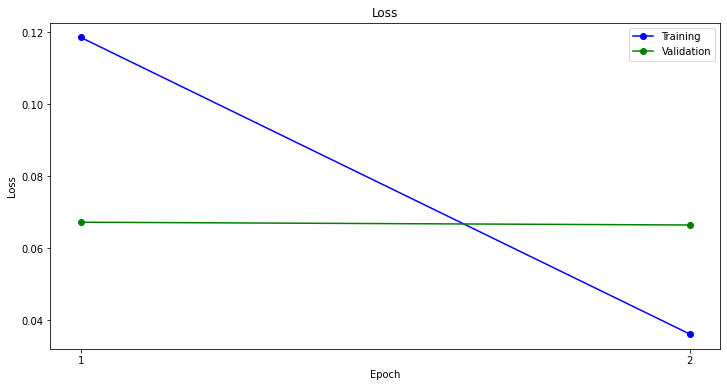

In [0]:
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2])

plt.show()


In [0]:
input_ids = []
at_masks = []

for sent in test.title.values:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      
                        add_special_tokens = True, 
                        max_length = 64,           
                        pad_to_max_length = True,
                        return_attention_mask = True, 
                        return_tensors = 'pt',
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    
    at_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
at_masks = torch.cat(at_masks, dim=0)
labels = torch.tensor(test.Label.values)

batch_size = 32  

prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [0]:

model.eval()

predictions , true_labels = [], []

for batch in prediction_dataloader:
  batch = tuple(t.to('cuda') for t in batch)
  
  batch_input_ids, batch_input_mask, batch_labels = batch

  with torch.no_grad():
      outputs = model(batch_input_ids, token_type_ids=None, attention_mask=batch_input_mask)

  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  label_ids = batch_labels.to('cpu').numpy()

  predictions.append(logits)
  true_labels.append(label_ids)

In [0]:
predlabels = []
for i in range(len(true_labels)):
    pred_labels_i = np.argmax(predictions[i], axis=1).flatten()

    predlabels.append(pred_labels_i)


[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
print(predlabels[10])
len(predlabels[0])
print(true_labels[10])
print(len(true_labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
280


In [0]:
test_accuracy = 0
for i in range(len(true_labels)):
    test_accuracy += np.sum(np.array(predlabels[i]) == np.array(true_labels[i]))

In [0]:
test_accuracy / len(true_labels*32)

0.9736607142857143